# Expected number of solutions at distance $N\delta$ from a random source

Computes the exponential growth rate $\Psi(\delta)$ of the average of the number $\mathcal{N}(N\delta)$ of solutions that are at distance $N\delta$ from a random vector $x_*$ with i.i.d entries drawn from a Bernouilli law with parameter $p\in[0,1]$ :

$\Psi(\delta)=\lim_{N\to\infty}(1/N)\log \mathbb{E}[\mathcal{N}(N\delta)]$, where the average is over the graph ensemble and the source $x_*$. 

$\Psi(\delta)$ is an annealed average, and $\mathbb{E}[\mathcal{N}(N\delta)]$ gives an upper bound on the probability of having a solution at distance $N\delta$ from a random source.

This is for a particular degree profile: for the check nodes one takes $P(x)=x^k$, and for the variables nodes one takes $\Lambda(x)=\Lambda_1 x+\Lambda_2 x^2$. In the limit $N\to\infty$ the fractions $\Lambda_1, \Lambda_2$ are taken constants.

In [1]:
include("header.jl")

zeroPsi (generic function with 1 method)

Set the degree profile $k\in \mathbb{N}$ and the Bernouilli parameter $p$. The positive real number $y_0$ is an initial condition for the iterative resolution of a fixed-point equation (see equations (11.18), (11.19) in the book of Marc Mézard and Andrea Montatari).


In [2]:
k = 8
p = 0.1
y0=0.5

0.5

Then plot the function $\Psi$=Psi as a function of $\delta\in[0,1]$ for several values of $\Lambda_1\in[0,1]$, ($\Lambda_2=1-\Lambda_1$)

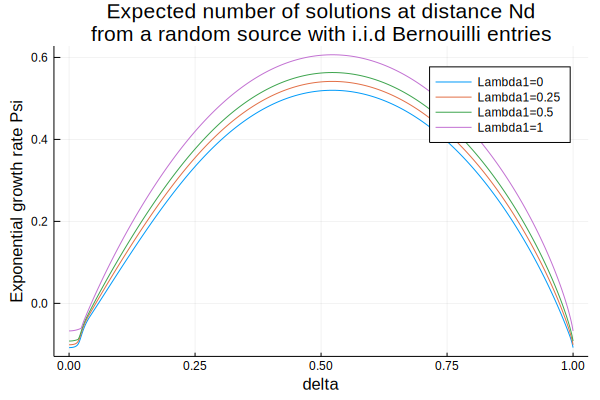

In [3]:
D = range(0., 1, length=500) #range of delta

lambda1 = 0.
lambda2 = 1-lambda1
Ps = Psi.(D, p, lambda1, lambda2, k, y0)
plot(D, Ps, label = "Lambda1=0", xlabel = "delta", ylabel = "Exponential growth rate Psi")

lambda1 = 0.25
lambda2 = 1-lambda1
Ps1 = Psi.(D, p, lambda1, lambda2, k, y0)
plot!(D, Ps1, label = "Lambda1=0.25")

lambda1 = 0.5
lambda2 = 1-lambda1
Ps1 = Psi.(D, p, lambda1, lambda2, k, y0)
plot!(D, Ps1, label = "Lambda1=0.5")

lambda1 = 1.
lambda2 = 1-lambda1
Ps2 = Psi.(D, p, lambda1, lambda2, k, y0)
res = plot!(D, Ps2, label = "Lambda1=1")

title!("Expected number of solutions at distance Nd
from a random source with i.i.d Bernouilli entries")
#savefig(res, "file")

At $p=0$, the source vector is not random, $x_*=0$, and one recovers the growth rate of the weight enumerator function (WEF). In this case there is no gap at small distances, for any value of $\Lambda_1\in[0,1]$, as it was shown in the book of Mézard and Montanari.

It seems that as soon as $p$ takes a value different from $0$ or $1$, there is a gap at small hamming distances. Increasing the fraction $\Lambda_1$ of leaves has the effect of reducing this gap, as it was expected, although the gap remains non-zero for any values of $\Lambda_1$. 

# Plot the position of the zero as a function of $\alpha$

We can plot $\delta_0$, the position of the zero of the function $\Psi$: $\Psi(\delta_0; \{p, \Lambda_1, k\})=0$ as a function of $\Lambda_1$, or equivalently as a function of the density of constraints $\alpha = \Lambda'(1)/P'(1)=(\Lambda_1+2\Lambda_2)/k=(2-\Lambda_1)/k$. (The zero is obtained by bisection between $\delta=0$ and $\delta=0.5$)

First as a function of $\Lambda_1\in[0, 1]$

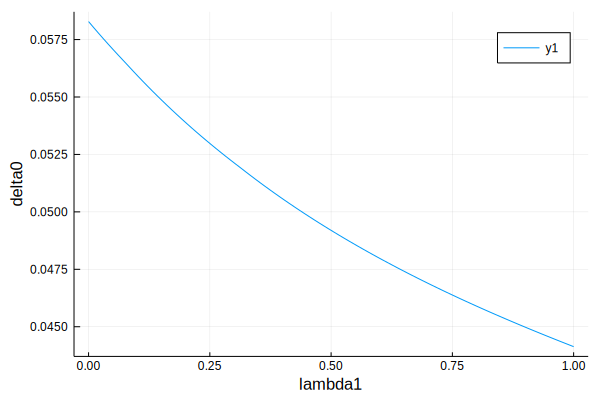

In [4]:
L1 = range(0., 1., length=100) # range of lambda1
ZP = zeroPsi.(p, L1, k, y0)
plot(L1, ZP, xlabel = "lambda1", ylabel = "delta0")

Now plot $\delta_0$ as a function of $\alpha\in[1/k, 2/k]$

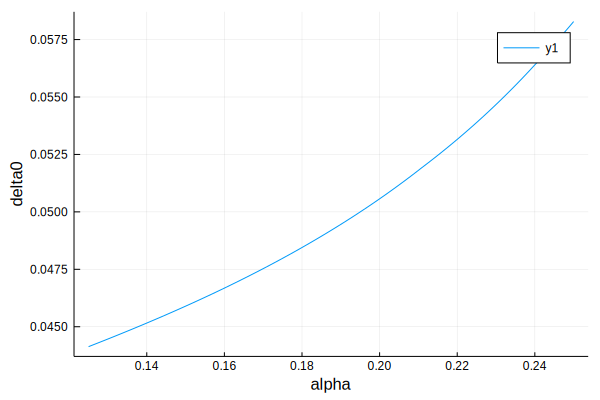

In [5]:
AL = range(1/k, 2/k, length=100) #range of alpha
f(a)=2-a*k
l1 = f.(AL)
zP = zeroPsi.(p, l1, k, y0)
plot(AL, zP, xlabel = "alpha", ylabel = "delta0")